In [63]:
import hashlib, time, sys
from statistics import mean
from multiprocessing import Process
from random import randint

In [64]:
loop = 3
loop_timelimit = 150

In [65]:
def pow(target):

    time_result = []

    for _ in range(loop):
        challenge = '5JskLFx82fGh7eFP3c12XXX'
        solution = ''
        hash_solution = ''
        start = time.time()
        while hash_solution[:target] != '0'*target:
            nonce = randint(0, sys.maxsize)
            solution = challenge + str(nonce)
            hash_solution = hashlib.sha256(solution.encode('utf-8')).hexdigest()
        totaltime = time.time() - start

        # print('time: ', totaltime)
        time_result.append(totaltime)
        # print('sha256: ', hash_solution)
        # print('block: ', solution)
        # print('nonce: ', nonce)

    mean_time = mean(time_result)
    # print('Total target mean time ' + str(mean_time))
    
    with open('time_values.csv', 'a') as f:
        f.write(str(mean_time) + ',')

In [66]:
f = open('pow_time_values.csv', 'w')
f.close()

In [67]:
target = 1

In [68]:
while True:
    p = Process(target=pow, name="PoW", args=(target,))
    tlimit = time.time()
    p.start()
    p.join(loop_timelimit)
    if p.is_alive():
        p.terminate()
        p.join()
        print('Time limit ! ' + str(time.time() - tlimit))
        break
    # print('Target ' + str(target) + ' over !')
    target += 1

print('DONE.')

Time limit ! 150.10594058036804
DONE.


# *Visualization :*

In [2]:
import csv
from matplotlib import pyplot as plt

In [3]:
with open('pow_time_values.csv', newline='') as f:
    reader = csv.reader(f)
    data_time = list(reader)[0]

In [4]:
data_time.remove('')
for i in range(len(data_time)):
    data_time[i] = float(data_time[i])

In [5]:
targets = list(range(1, len(data_time) + 1, 1))

Text(0, 0.5, 'Time (s)')

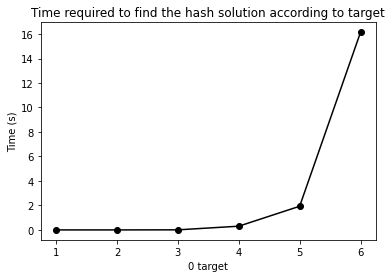

In [6]:
plt.plot(targets, data_time, '-ok')
plt.title('Time required to find the hash solution according to target')
plt.xlabel('0 target')
plt.ylabel('Time (s)')